# Q2 - Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df['Sex'].unique()


array(['F', 'M'], dtype=object)

In [8]:
#Encoding
df['Sex'] = df['Sex'].map({'F':0,'M':1})

In [9]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [10]:
#Encoding
df['BP'] = df['BP'].map({'HIGH':0,'LOW':1,'NORMAL':2})

In [11]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
#Encoding
df['Drug'] = df['Drug'].map({'drugY':0,'drugC':1,'drugX':2,'drugA':3,'drugB':4})

In [13]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [14]:
#Encoding
df['Cholesterol'] = df['Cholesterol'].map({'HIGH':0,'NORMAL':1})

In [15]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,2
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,1
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


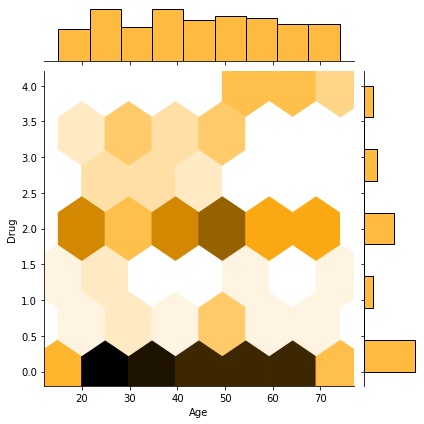

In [17]:
sns.jointplot(x='Age',y='Drug',kind = 'hex',color = 'orange',data = df)

<AxesSubplot:>

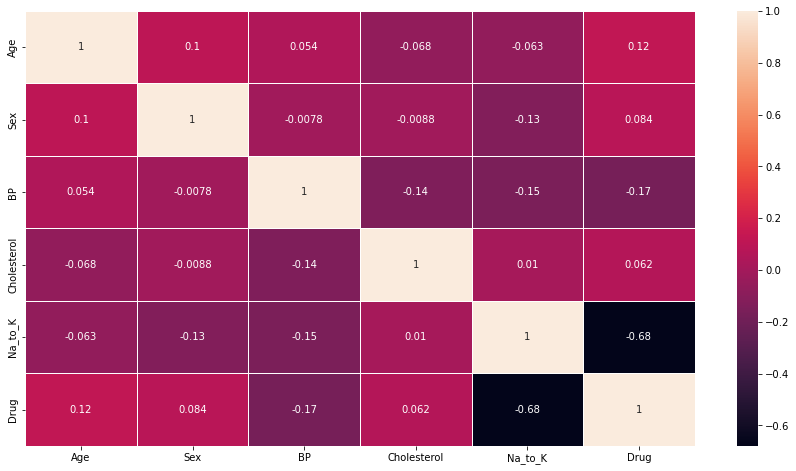

In [32]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [18]:
#Dividing the data between independent and dependent variables 
X = df.drop(['Drug'],axis=1).values
Y = df['Drug']


In [19]:
X

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607],
       [49.   ,  0.   ,  2.   ,  0.   , 16.275],
       [41.   ,  1.   ,  1.   ,  0.   , 11.037],
       [60.   ,  1.   ,  2.   ,  0.   , 15.171],
       [43.   ,  1.   ,  1.   ,  1.   , 19.368],
       [47.   ,  0.   ,  1.   ,  0.   , 11.767],
       [34.   ,  0.   ,  0.   ,  1.   , 19.199],
       [43.   ,  1.   ,  1.   ,  0.   , 15.376],
       [74.   ,  0.   ,  1.   ,  0.   , 20.942],
       [50.   ,  0.   ,  2.   ,  0.   , 12.703],
       [16.   ,  0.   ,  0.   ,  1.   , 15.516],
       [69.   ,  1.   ,  1.   ,  1.   , 11.455],
       [43.   ,  1.   ,  0.   ,  0.   , 13.972],
       [23.   ,  1.   ,  1.   ,  0.   ,  7.298],
       [32.   ,  0.   ,  0.   ,  1.   , 25.974],
       [57.   ,  1. 

In [20]:
Y

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug, Length: 200, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state = 42)

In [22]:
X_train

array([[50.   ,  1.   ,  2.   ,  1.   , 15.79 ],
       [64.   ,  1.   ,  0.   ,  1.   , 20.932],
       [62.   ,  1.   ,  2.   ,  0.   , 16.594],
       [55.   ,  0.   ,  0.   ,  0.   , 10.977],
       [67.   ,  1.   ,  2.   ,  1.   , 10.898],
       [35.   ,  1.   ,  2.   ,  1.   ,  7.845],
       [43.   ,  1.   ,  2.   ,  1.   , 12.859],
       [58.   ,  0.   ,  0.   ,  1.   , 14.239],
       [32.   ,  0.   ,  0.   ,  1.   , 10.292],
       [65.   ,  0.   ,  1.   ,  1.   , 13.769],
       [31.   ,  1.   ,  0.   ,  0.   , 30.366],
       [69.   ,  0.   ,  2.   ,  0.   , 10.065],
       [31.   ,  1.   ,  0.   ,  1.   , 11.871],
       [47.   ,  0.   ,  2.   ,  1.   ,  6.683],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [26.   ,  0.   ,  0.   ,  1.   , 19.161],
       [37.   ,  0.   ,  0.   ,  0.   , 13.091],
       [47.   ,  1.   ,  0.   ,  0.   , 10.403],
       [23.   ,  1.   ,  0.   ,  0.   ,  8.011],
       [59.   ,  1.   ,  0.   ,  0.   , 13.935],
       [57.   ,  0. 

In [23]:
Y_train

42     0
189    0
90     0
136    4
51     2
      ..
106    2
14     2
92     0
179    0
102    1
Name: Drug, Length: 134, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions = model.predict(X_test)

In [27]:
predictions

array([2, 0, 2, 2, 0, 0, 0, 2, 3, 2, 3, 2, 0, 0, 4, 0, 4, 2, 2, 0, 4, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 3, 0, 2, 0, 0, 3, 2, 2, 2, 0,
       0, 0, 0, 0, 4, 2, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 0, 0, 4, 0, 2, 0])

In [28]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(Y_test,predictions)
score = accuracy_score(Y_test,predictions)
cr = classification_report(Y_test,predictions)

In [29]:
cm

array([[27,  0,  1,  0,  1],
       [ 2,  1,  3,  0,  0],
       [ 0,  0, 19,  0,  0],
       [ 3,  0,  0,  4,  1],
       [ 0,  0,  0,  0,  4]])

In [30]:
score

0.8333333333333334

In [31]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       1.00      0.17      0.29         6
           2       0.83      1.00      0.90        19
           3       1.00      0.50      0.67         8
           4       0.67      1.00      0.80         4

    accuracy                           0.83        66
   macro avg       0.87      0.72      0.71        66
weighted avg       0.86      0.83      0.80        66

